In [155]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [156]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [157]:
# Load Dataset
inputPath = "Churn_Modelling.csv"
dataset = pd.read_csv(inputPath, header=0)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [158]:
# Pre processing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [159]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [160]:
# Categorical data points exploration
# Gender, Geography are the useful data points, where as surname is of no significance for the model.
dataset.groupby("Gender")["Geography"].count()

Gender
Female    4543
Male      5457
Name: Geography, dtype: int64

In [161]:
dataset.groupby("Geography")["Gender"].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Gender, dtype: int64

In [162]:
dataset["Gender1"] = dataset["Gender"]
dataset["Gender"] = pd.Categorical(dataset["Gender"])
dataset["Gender"] = dataset["Gender"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,Female
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,Female
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,Female
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,Female
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,Female


In [163]:
dataset["Geography1"] = dataset["Geography"]
dataset["Geography"] = pd.Categorical(dataset["Geography"])
dataset["Geography"] = dataset["Geography"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain


In [164]:
# Copy Dataset for creating models
dataset1 = dataset.copy() 
dataset1 = dataset1.drop(["CustomerId"], axis=1)
dataset1 = dataset1.drop(["Surname"], axis=1)
dataset1 = dataset1.drop(["RowNumber"], axis=1)
dataset1 = dataset1.drop(["Gender1"], axis=1)
dataset1 = dataset1.drop(["Geography1"], axis=1)
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [165]:
# Age binning
dataset["AgeBin"] = pd.cut(dataset['Age'], [0, 16, 32,48,64,500])
dataset["AgeBin"] = pd.Categorical(dataset["AgeBin"])
dataset["AgeBin"] = dataset["AgeBin"].cat.codes
dataset.loc[dataset["Age"] > 60].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin
42,43,15687946,Osborne,556,0,0,61,2,117419.35,1,1,1,94153.83,0,Female,France,3
44,45,15684171,Bianchi,660,2,0,61,5,155931.11,1,1,1,158338.39,0,Female,Spain,3
58,59,15623944,T'ien,511,2,0,66,4,0.00,1,1,0,1643.11,1,Female,Spain,4
85,86,15805254,Ndukaku,652,2,0,75,10,0.00,2,1,1,114675.75,0,Female,Spain,4
104,105,15804919,Dunbabin,670,2,0,65,1,0.00,1,1,1,177655.68,1,Female,Spain,4


In [166]:
# Binning credit score
dataset['CreditScoreBin'] = pd.cut(dataset['CreditScore'], [0, 450, 550,650,750,900])

dataset["CreditScoreBin"] = pd.Categorical(dataset["CreditScoreBin"])
dataset["CreditScoreBin"] = dataset["CreditScoreBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4


In [167]:
# Binning Balance
dataset['BalanceBin'] = pd.cut(dataset['Balance'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["BalanceBin"] = pd.Categorical(dataset["BalanceBin"])
dataset["BalanceBin"] = dataset["BalanceBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2


In [168]:
# Binning Estimated Salary
dataset['EstimatedSalaryBin'] = pd.cut(dataset['EstimatedSalary'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["EstimatedSalaryBin"] = pd.Categorical(dataset["EstimatedSalaryBin"])
dataset["EstimatedSalaryBin"] = dataset["EstimatedSalaryBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender1,Geography1,AgeBin,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Female,France,2,2,0,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Female,Spain,2,2,1,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Female,France,2,1,3,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Female,France,2,3,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Female,Spain,2,4,2,1


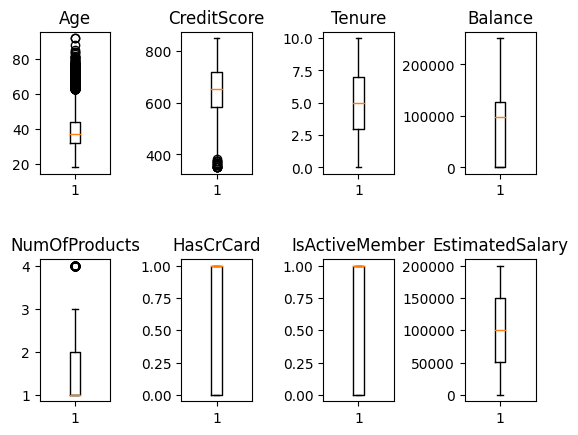

In [169]:
# Exploratory Analysis
# Box plot
fig, ((a,b,c,d),(e,f,g,h)) = plt.subplots(2,4)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=0.6)

a.set_title("Age")
a.boxplot(dataset["Age"])
b.set_title("CreditScore")
b.boxplot(dataset["CreditScore"])
c.set_title("Tenure")
c.boxplot(dataset["Tenure"])
d.set_title("Balance")
d.boxplot(dataset["Balance"])
e.set_title("NumOfProducts")
e.boxplot(dataset["NumOfProducts"])
f.set_title("HasCrCard")
f.boxplot(dataset["HasCrCard"])
g.set_title("IsActiveMember")
g.boxplot(dataset["IsActiveMember"])
h.set_title("EstimatedSalary")
h.boxplot(dataset["EstimatedSalary"])
plt.show()

In [170]:
# Correlation
dataset.corr()["Exited"]

C:\Users\User\AppData\Local\Temp\ipykernel_10108\4231925859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()["Exited"]


RowNumber            -0.016571
CustomerId           -0.006248
CreditScore          -0.027094
Geography             0.035943
Gender               -0.106512
Age                   0.285323
Tenure               -0.014001
Balance               0.118533
NumOfProducts        -0.047820
HasCrCard            -0.007138
IsActiveMember       -0.156128
EstimatedSalary       0.012097
Exited                1.000000
AgeBin                0.256200
CreditScoreBin       -0.031312
BalanceBin            0.117289
EstimatedSalaryBin    0.013660
Name: Exited, dtype: float64

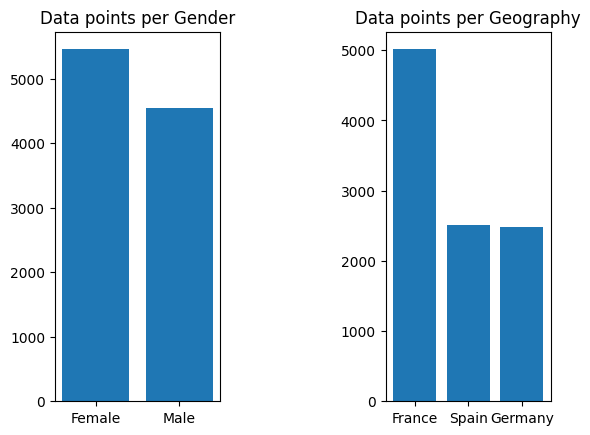

In [171]:
fig, ((a,b)) = plt.subplots(1,2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
a.set_title("Data points per Gender")
a.bar(dataset["Gender1"].unique(),dataset.iloc[:,14].value_counts())
b.set_title("Data points per Geography")
b.bar(dataset["Geography1"].unique(),dataset.iloc[:,15].value_counts())
plt.show()

In [172]:
# Remove the non-necessary fields
dataset = dataset.drop(["CustomerId"], axis=1)
dataset = dataset.drop(["Gender1"], axis=1)
dataset = dataset.drop(["Geography1"], axis=1)
dataset = dataset.drop(["Age"], axis=1)
dataset = dataset.drop(["CreditScore"], axis=1)
dataset = dataset.drop(["Balance"], axis=1)
dataset = dataset.drop(["EstimatedSalary"], axis=1)
dataset = dataset.drop(["Surname"], axis=1)
dataset = dataset.drop(["RowNumber"], axis=1)

In [173]:
# Random shuffle of records 
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [116]:
# Random shuffle of records 
dataset = dataset.sample(frac=1).reset_index(drop=True)

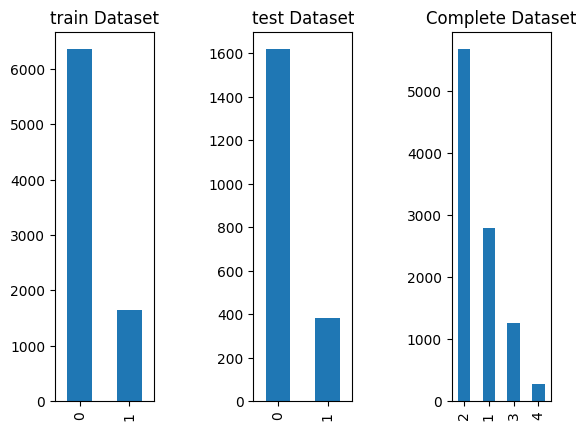

In [175]:
# Check the distribution of Exited in train & Test datasets
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=1)
plt.subplot(1,3,1)
y_train.iloc[:].value_counts().plot(kind = 'bar',title="train Dataset")
plt.subplot(1,3,2)
y_test.iloc[:].value_counts().plot(kind = 'bar',title="test Dataset")
plt.subplot(1,3,3)
dataset.iloc[:,7].value_counts().plot(kind = 'bar',title="Complete Dataset")
plt.show()

In [176]:
# Decision Trees
clf = DecisionTreeClassifier(random_state=0, max_depth = 10, max_leaf_nodes=None)
model_tree = clf.fit(x_train_dt, y_train_dt)
print(model_tree)
# Predict test data
y_pred = model_tree.predict(x_test_dt)

DecisionTreeClassifier(max_depth=10, random_state=0)


In [177]:
dataset.keys()

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'AgeBin', 'CreditScoreBin', 'BalanceBin',
       'EstimatedSalaryBin'],
      dtype='object')

In [178]:
dataset.values

array([[ 1,  1,  7, ...,  3,  2,  1],
       [ 2,  0, 10, ...,  3,  2,  2],
       [ 0,  1,  5, ...,  4,  2,  1],
       ...,
       [ 2,  0,  1, ...,  3,  2,  1],
       [ 0,  1,  6, ...,  2,  0,  0],
       [ 0,  1,  6, ...,  0,  0,  2]], dtype=int64)

In [179]:
dataset.shape

(10000, 11)

In [180]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [181]:
dataset

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,AgeBin,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,1,1,7,2,1,1,0,2,3,2,1
1,2,0,10,1,1,0,0,1,3,2,2
2,0,1,5,1,0,0,0,1,4,2,1
3,0,0,7,2,0,0,0,1,4,0,3
4,1,0,5,2,1,0,0,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,7,2,0,1,0,1,1,0,2
9996,0,0,4,2,1,0,0,1,4,0,3
9997,2,0,1,1,1,1,0,2,3,2,1
9998,0,1,6,1,1,1,1,2,2,0,0


In [182]:
dataset.keys()

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'AgeBin', 'CreditScoreBin', 'BalanceBin',
       'EstimatedSalaryBin'],
      dtype='object')

In [183]:
print(dataset.groupby('Geography').size())

Geography
0    5014
1    2509
2    2477
dtype: int64


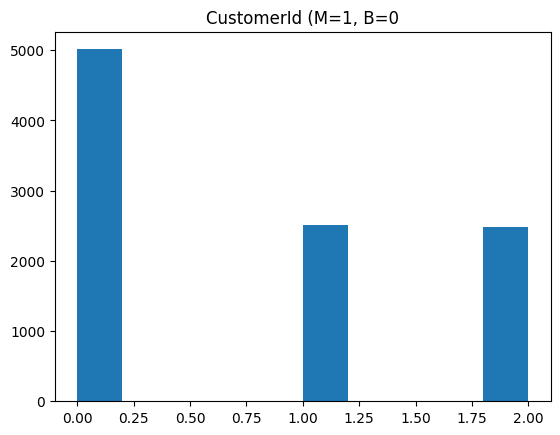

In [184]:
dataset.describe()

plt.hist(dataset['Geography']) 
plt.title('CustomerId (M=1, B=0') 
plt.show()

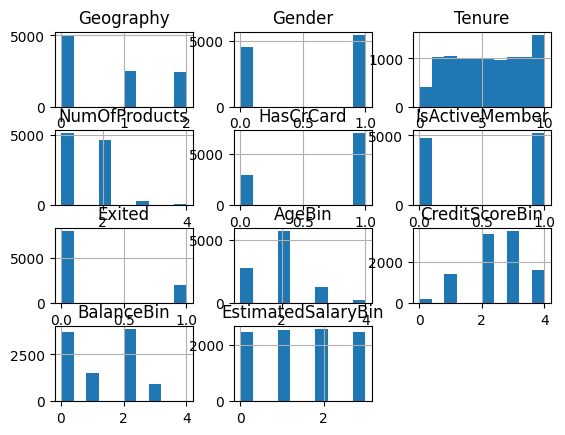

In [185]:
#histogram

dataset.hist() 
plt.show()

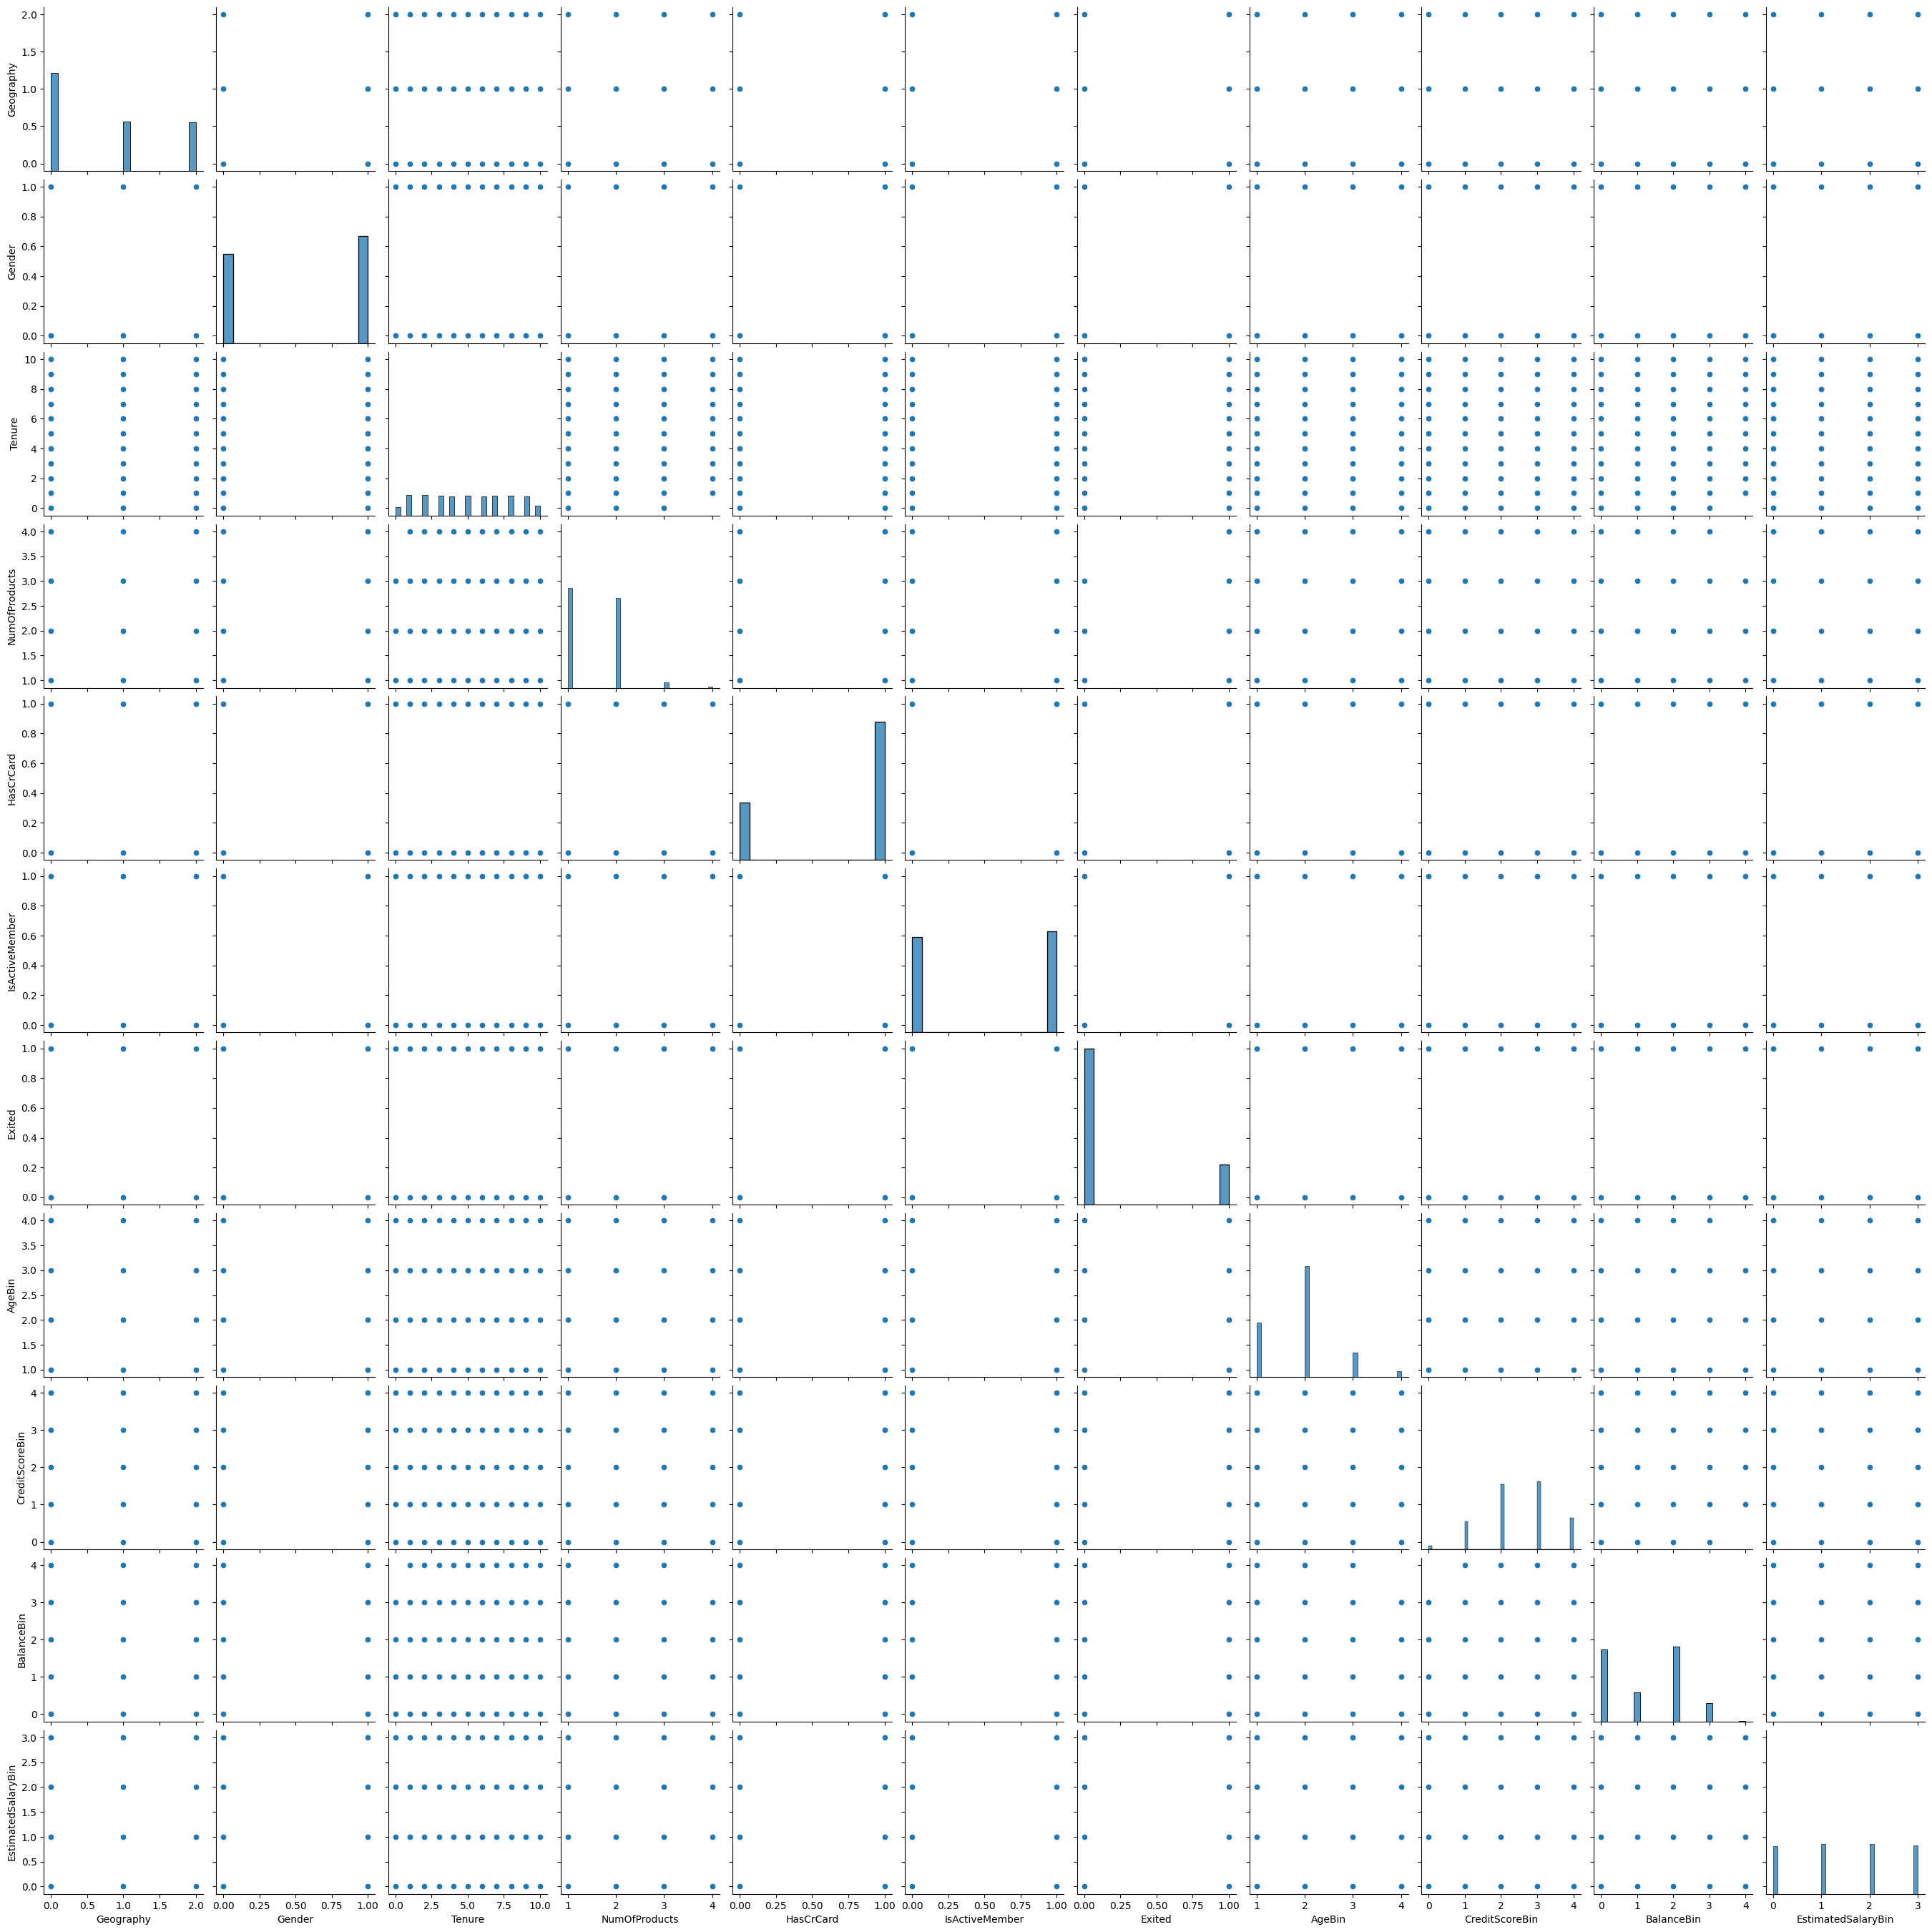

In [186]:
#multivariate plot
sns.pairplot(dataset)

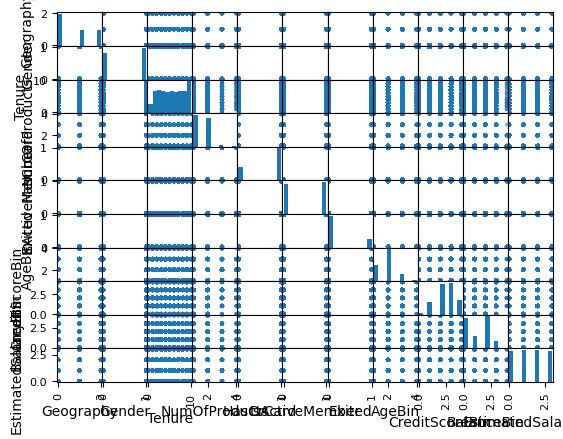

In [187]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

In [188]:
#Ubah data dengan tipe data object menjadi numerical dengan menggunakan Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
#backup dataset
dataset = dataset.copy()
#encode categorical data 
ordnl_enc = OrdinalEncoder()
dataset[['Geography']] = ordnl_enc.fit_transform(dataset[['Geography']])

In [189]:
#splitting validation
array = dataset.values
x = array[:,0:6]
y = array[:,-1]
x

array([[ 1.,  1.,  7.,  2.,  1.,  1.],
       [ 2.,  0., 10.,  1.,  1.,  0.],
       [ 0.,  1.,  5.,  1.,  0.,  0.],
       ...,
       [ 2.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  6.,  1.,  1.,  1.],
       [ 0.,  1.,  6.,  2.,  0.,  1.]])

In [190]:
y

array([1., 2., 1., ..., 1., 0., 2.])

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [192]:
x_train

array([[2., 1., 0., 1., 0., 1.],
       [0., 1., 9., 2., 1., 1.],
       [0., 0., 9., 1., 1., 1.],
       ...,
       [1., 0., 1., 1., 0., 0.],
       [1., 1., 3., 1., 1., 1.],
       [2., 1., 2., 2., 1., 1.]])

In [193]:
y_train

array([3., 2., 3., ..., 1., 3., 0.])

In [194]:
y_test

array([3., 2., 1., ..., 3., 2., 2.])

In [195]:
# Decision Trees
clf = DecisionTreeClassifier(random_state=0, max_depth = 10, max_leaf_nodes=None)
model_tree = clf.fit(x_train_dt, y_train_dt)
print(model_tree)
# Predict test data
y_pred = model_tree.predict(x_test_dt)

DecisionTreeClassifier(max_depth=10, random_state=0)


In [196]:
y_pred = model_tree.predict(x_test_dt)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[382,  82,   0,   0],
       [425,  80,   0,   0],
       [433,  83,   0,   0],
       [434,  81,   0,   0]], dtype=int64)

<AxesSubplot: >

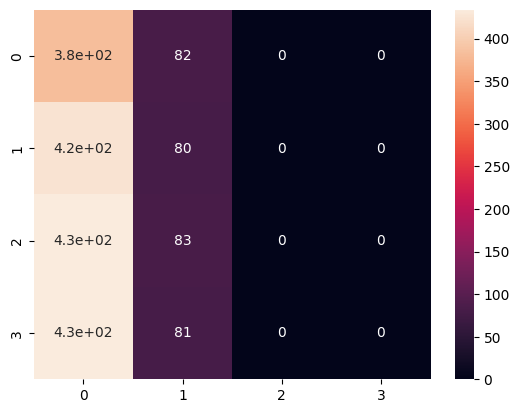

In [198]:
sns.heatmap(cm, annot=True)

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.23      0.82      0.36       464
         1.0       0.25      0.16      0.19       505
         2.0       0.00      0.00      0.00       516
         3.0       0.00      0.00      0.00       515

    accuracy                           0.23      2000
   macro avg       0.12      0.25      0.14      2000
weighted avg       0.11      0.23      0.13      2000



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [203]:
print("accuracy : ", model_tree.score(x_test_dt,y_test))

accuracy :  0.231


In [201]:
import pickle
Pkl_Filename = "model_tree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_tree, file)

In [202]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

DecisionTreeClassifier(max_depth=10, random_state=0)